# Spatial Data

## 📖 Ahead of time...

This block is all about understanding spatial data, both conceptually and practically. Before your fingers get on the keyboard, the following readings will help you get going and familiar with core ideas: 

- [Chapter 2](https://geographicdata.science/book/notebooks/02_geo_thinking.html) of the GDS Book {cite}`reyABwolf`, which provides a conceptual overview of representing Geography in data
- [Chapter 3](https://geographicdata.science/book/notebooks/03_spatial_data.html) of the GDS Book {cite}`reyABwolf`, a sister chapter with a more applied perspective on how concepts are implemented in computer data structures

Additionally, parts of this block are based and source from [Block C](https://darribas.org/gds_course/content/bC/lab_C.html) in the GDS Course {cite}`darribas_gds_course`.


## 💻 Hands-on coding

### (Geographic) tables

In [1]:
import pandas
import geopandas
import xarray, rioxarray
import contextily
import matplotlib.pyplot as plt

#### Points


```{margin} Data
If you want to read more about the data sources behind this dataset, head to the [Datasets](../data/datasets) section
```



````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
pts = geopandas.read_file("../data/madrid_abb.gpkg")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
pts = geopandas.read_file(
    "https://github.com/GDSL-UL/san/raw/v0.1.0/data/assignment_1_madrid/madrid_abb.gpkg"
)
```
````

In [2]:
pts = geopandas.read_file("../data/madrid_abb.gpkg")

````{admonition} Point geometries from columns
:class: dropdown

Sometimes, points are provided as separate columns in an otherwise non-spatial table. For example imagine we have an object `cols` which looks like:

```python
cols.head()
```

```
          X         Y
0  0.259602  0.854351
1  0.661662  0.782427
2  0.932211  0.319130
3  0.395249  0.469885
4  0.303446  0.008525
```

In this case, we can convert those into proper geometries by:

```python
pts = geopandas.GeoSeries(
    geopandas.points_from_xy(cols["X"], cols["Y"])
)
```
````

In [3]:
pts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18399 entries, 0 to 18398
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            18399 non-null  object  
 1   price_usd        18399 non-null  float64 
 2   log1p_price_usd  18399 non-null  float64 
 3   accommodates     18399 non-null  int64   
 4   bathrooms        18399 non-null  object  
 5   bedrooms         18399 non-null  float64 
 6   beds             18399 non-null  float64 
 7   neighbourhood    18399 non-null  object  
 8   room_type        18399 non-null  object  
 9   property_type    18399 non-null  object  
 10  WiFi             18399 non-null  object  
 11  Coffee           18399 non-null  object  
 12  Gym              18399 non-null  object  
 13  Parking          18399 non-null  object  
 14  km_to_retiro     18399 non-null  float64 
 15  geometry         18399 non-null  geometry
dtypes: float64(5), geometry(1), int6

In [4]:
pts.head()

price  price_usd  log1p_price_usd  accommodates       bathrooms  \
0   $60.00       60.0         4.110874             2   1 shared bath   
1   $31.00       31.0         3.465736             1          1 bath   
2   $60.00       60.0         4.110874             6         2 baths   
3  $115.00      115.0         4.753590             4       1.5 baths   
4   $26.00       26.0         3.295837             1  1 private bath   

   bedrooms  beds   neighbourhood        room_type              property_type  \
0       1.0   1.0  Hispanoamérica     Private room  Private room in apartment   
1       1.0   1.0        Cármenes     Private room  Private room in apartment   
2       3.0   5.0         Legazpi  Entire home/apt           Entire apartment   
3       2.0   3.0        Justicia  Entire home/apt           Entire apartment   
4       1.0   1.0         Legazpi     Private room      Private room in house   

  WiFi Coffee Gym Parking  km_to_retiro                   geometry  
0    1      0   0       0      5.116664  POINT (-3.67688 40.45724)  
1    1      1   0       1      5.563869  POINT (-3.74084 40.40341)  
2    1      1   0       1      3.048442  POINT (-3.69304 40.38695)  
3    1      1   0       1      2.075484  POINT (-3.69764 40.41995)  
4    1      0   0       0      2.648058  POINT (-3.69011 40.38985)

#### Lines

````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
pts = geopandas.read_file("../data/arturo_streets.gpkg")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
pts = geopandas.read_file(
    "https://darribas.org/gds4ae/_downloads/67d5480f98453027d59bf49606a7ad92/arturo_streets.gpkg"
)
```
````

In [5]:
lines = geopandas.read_file("../data/arturo_streets.gpkg")

In [6]:
lines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66499 entries, 0 to 66498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OGC_FID     66499 non-null  object  
 1   dm_id       66499 non-null  object  
 2   dist_barri  66483 non-null  object  
 3   X           66499 non-null  float64 
 4   Y           66499 non-null  float64 
 5   value       5465 non-null   float64 
 6   geometry    66499 non-null  geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 3.6+ MB


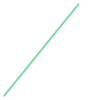

In [7]:
lines.loc[0, "geometry"]

#### Polygons

In [8]:
from IPython.display import GeoJSON
GeoJSON("../data/neighbourhoods.geojson")

<IPython.display.GeoJSON object>

````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
polys = geopandas.read_file("../data/neighbourhoods.geojson")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
polys = geopandas.read_file(
    "https://darribas.org/gds4ae/_downloads/44b4bc22c042386c2c0f8dc6685ef17c/neighbourhoods.geojson"
)
```
````

In [9]:
polys = geopandas.read_file("../data/neighbourhoods.geojson")

In [10]:
polys.head()

neighbourhood neighbourhood_group  \
0       Palacio              Centro   
1   Embajadores              Centro   
2        Cortes              Centro   
3      Justicia              Centro   
4   Universidad              Centro   

                                            geometry  
0  MULTIPOLYGON (((-3.70584 40.42030, -3.70625 40...  
1  MULTIPOLYGON (((-3.70384 40.41432, -3.70277 40...  
2  MULTIPOLYGON (((-3.69796 40.41929, -3.69645 40...  
3  MULTIPOLYGON (((-3.69546 40.41898, -3.69645 40...  
4  MULTIPOLYGON (((-3.70107 40.42134, -3.70155 40...

In [11]:
polys.query("neighbourhood_group == 'Retiro'")

neighbourhood neighbourhood_group  \
13      Pacífico              Retiro   
14       Adelfas              Retiro   
15      Estrella              Retiro   
16         Ibiza              Retiro   
17     Jerónimos              Retiro   
18    Niño Jesús              Retiro   

                                             geometry  
13  MULTIPOLYGON (((-3.67015 40.40654, -3.67017 40...  
14  MULTIPOLYGON (((-3.67283 40.39468, -3.67343 40...  
15  MULTIPOLYGON (((-3.66506 40.40647, -3.66512 40...  
16  MULTIPOLYGON (((-3.66916 40.41796, -3.66927 40...  
17  MULTIPOLYGON (((-3.67874 40.40751, -3.67992 40...  
18  MULTIPOLYGON (((-3.66994 40.40850, -3.67012 40...

In [12]:
polys.neighbourhood_group.unique()

array(['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín',
       'Moratalaz', 'Tetuán', 'Chamberí', 'Fuencarral - El Pardo',
       'Moncloa - Aravaca', 'Puente de Vallecas', 'Latina', 'Carabanchel',
       'Usera', 'Ciudad Lineal', 'Hortaleza', 'Villaverde',
       'Villa de Vallecas', 'Vicálvaro', 'San Blas - Canillejas',
       'Barajas'], dtype=object)

### Surfaces

````{tabbed} Local files

Assuming you have the file locally on the path `../data/`: 

```python
sat = xarray.open_rasterio("../data/madrid_scene_s2_10_tc.tif")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
sat = xarray.open_rasterio(
    "https://darribas.org/gds4ae/_downloads/cafed4de0cfde63e6d2ffcb92264b431/madrid_scene_s2_10_tc.tif"
)
```
````

In [13]:
sat = xarray.open_rasterio("../data/madrid_scene_s2_10_tc.tif")

In [14]:
sat

<xarray.DataArray (band: 3, y: 3681, x: 3129)>
[34553547 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 4.499e+06 4.499e+06 4.499e+06 ... 4.463e+06 4.463e+06
  * x        (x) float64 4.248e+05 4.248e+05 4.248e+05 ... 4.56e+05 4.56e+05
Attributes:
    transform:      (10.0, 0.0, 424760.0, 0.0, -10.0, 4499370.0)
    crs:            +init=epsg:32630
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

In [15]:
sat.sel(band=1)

<xarray.DataArray (y: 3681, x: 3129)>
[11517849 values with dtype=uint8]
Coordinates:
    band     int64 1
  * y        (y) float64 4.499e+06 4.499e+06 4.499e+06 ... 4.463e+06 4.463e+06
  * x        (x) float64 4.248e+05 4.248e+05 4.248e+05 ... 4.56e+05 4.56e+05
Attributes:
    transform:      (10.0, 0.0, 424760.0, 0.0, -10.0, 4499370.0)
    crs:            +init=epsg:32630
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

In [16]:
sat.sel(
    x=slice(430000, 440000),  # x is ascending
    y=slice(4480000, 4470000) # y is descending
)

<xarray.DataArray (band: 3, y: 1000, x: 1000)>
[3000000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 4.48e+06 4.48e+06 4.48e+06 ... 4.47e+06 4.47e+06
  * x        (x) float64 4.3e+05 4.3e+05 4.3e+05 ... 4.4e+05 4.4e+05 4.4e+05
Attributes:
    transform:      (10.0, 0.0, 424760.0, 0.0, -10.0, 4499370.0)
    crs:            +init=epsg:32630
    res:            (10.0, 10.0)
    is_tiled:       0
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

### Visualisation

<AxesSubplot:>

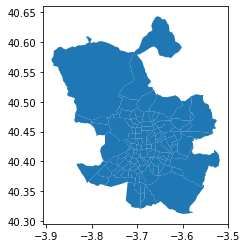

In [17]:
polys.plot()

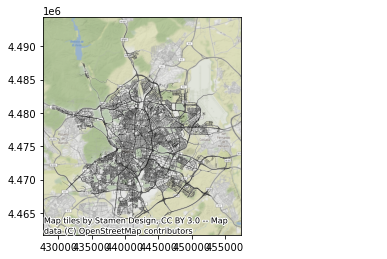

In [18]:
ax = lines.plot(linewidth=0.1, color="black")
contextily.add_basemap(ax, crs=lines.crs)

```{margin}
See more basemap options [here](https://contextily.readthedocs.io/en/latest/providers_deepdive.html).
```

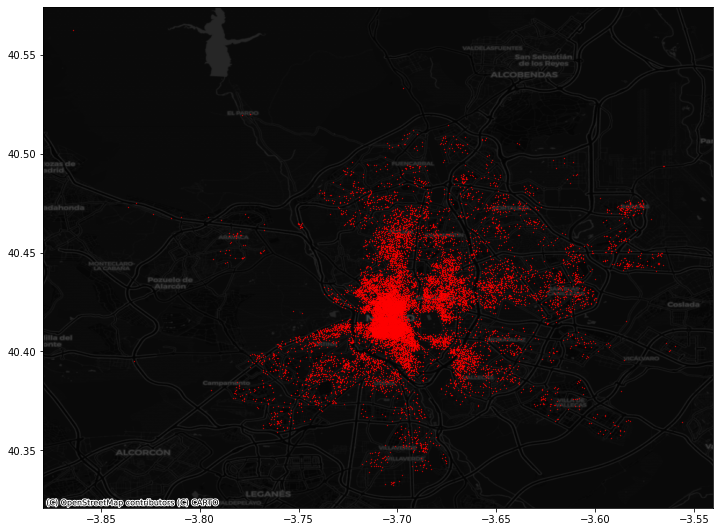

In [19]:
ax = pts.plot(color="red", figsize=(12, 12), markersize=0.1)
contextily.add_basemap(
    ax,
    crs = pts.crs,
    source = contextily.providers.CartoDB.DarkMatter
);

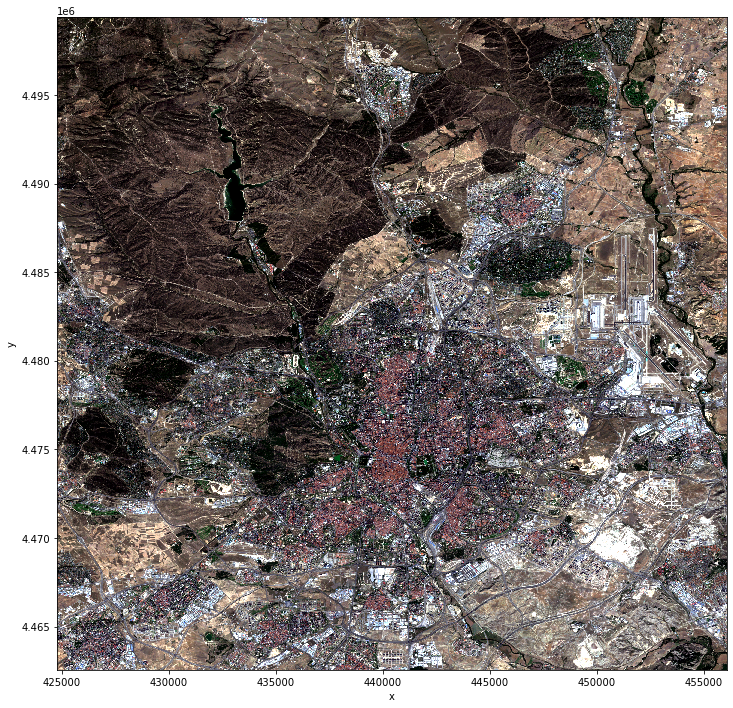

In [20]:
sat.plot.imshow(figsize=(12, 12))

````{margin} IMPORTANT
You will need version 1.1.0 of `contextily` to use label layers. Install it with:

```shell
pip install \
    -U --no-deps \
    contextily
```
````

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


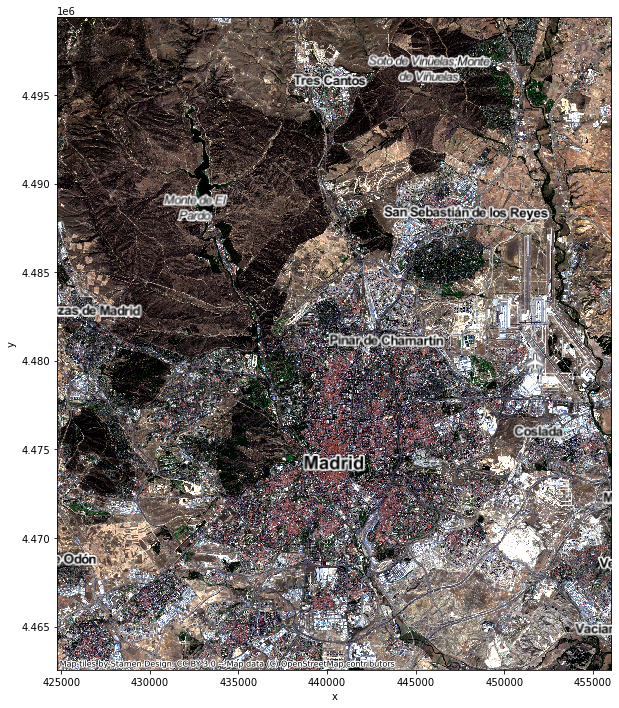

In [21]:
f, ax = plt.subplots(1, figsize=(12, 12))
sat.plot.imshow(ax=ax)
contextily.add_basemap(
    ax,
    crs=sat.rio.crs,
    source=contextily.providers.Stamen.TonerLabels,
    zoom=11
);

### Spatial operations

#### (Re-)Projections

In [22]:
pts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
sat.rio.crs

CRS.from_epsg(32630)

In [24]:
pts.to_crs(sat.rio.crs).crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
sat.rio.reproject(pts.crs).rio.crs

CRS.from_epsg(4326)

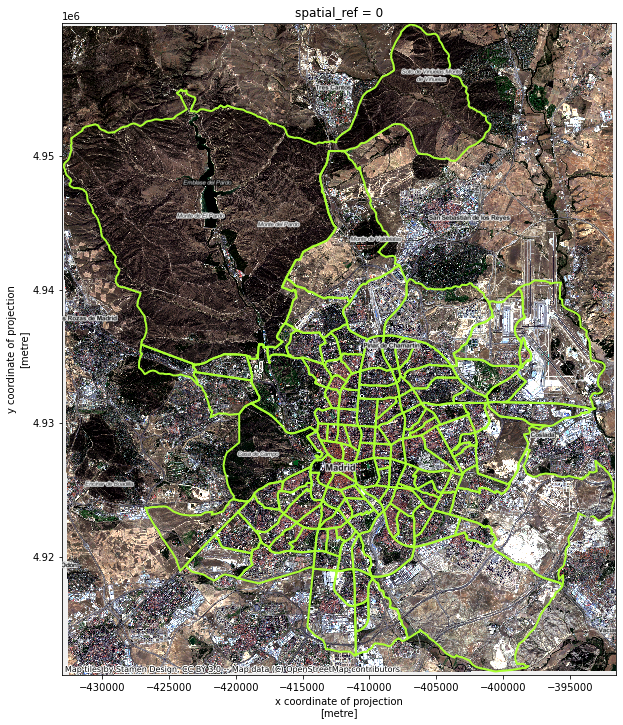

In [26]:
# All into Web Mercator (EPSG:3857)
f, ax = plt.subplots(1, figsize=(12, 12))
## Satellite image
sat.rio.reproject(
    "EPSG:3857"
).plot.imshow(
    ax=ax
)
## Neighbourhoods
polys.to_crs(epsg=3857).plot(
    linewidth=2, 
    edgecolor="xkcd:lime", 
    facecolor="none",
    ax=ax
)
## Labels
contextily.add_basemap( # No need to reproject
    ax,
    source=contextily.providers.Stamen.TonerLabels,
);

#### Centroids

```{margin}
Note the warning that geometric operations with non-project CRS object result in biases.
```

In [27]:
polys.centroid

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      POINT (-3.71398 40.41543)
1      POINT (-3.70237 40.40925)
2      POINT (-3.69674 40.41485)
3      POINT (-3.69657 40.42367)
4      POINT (-3.70698 40.42568)
                 ...            
123    POINT (-3.59135 40.45656)
124    POINT (-3.59723 40.48441)
125    POINT (-3.55847 40.47613)
126    POINT (-3.57889 40.47471)
127    POINT (-3.60718 40.46415)
Length: 128, dtype: geometry

In [28]:
lines.centroid

0        POINT (444133.737 4482808.936)
1        POINT (444192.064 4482878.034)
2        POINT (444134.563 4482885.414)
3        POINT (445612.661 4479335.686)
4        POINT (445606.311 4479354.437)
                      ...              
66494    POINT (451980.378 4478407.920)
66495    POINT (436975.438 4473143.749)
66496    POINT (442218.600 4478415.561)
66497    POINT (442213.869 4478346.700)
66498    POINT (442233.760 4478278.748)
Length: 66499, dtype: geometry

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

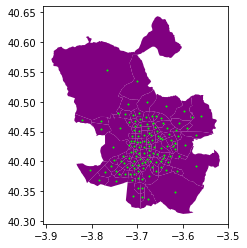

In [29]:
ax = polys.plot(color="purple")
polys.centroid.plot(
    ax=ax, color="lime", markersize=1
)

#### Spatial joins

```{margin}
More information about spatial joins in `geopandas` is available on its [documentation page](https://geopandas.org/mergingdata.html#spatial-joins)
```

In [30]:
sj = geopandas.sjoin(
    lines,
    polys.to_crs(lines.crs)
)

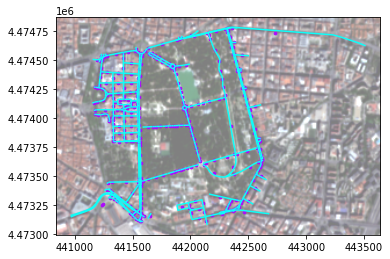

In [31]:
# Subset of lines
ax = sj.query(
    "neighbourhood == 'Jerónimos'"
).plot(color="xkcd:bright turquoise")

# Subset of line centroids
ax = sj.query(
    "neighbourhood == 'Jerónimos'"
).centroid.plot(
    color="xkcd:bright violet", markersize=7, ax=ax
)

# Local basemap
contextily.add_basemap(
    ax,
    crs=sj.crs,
    source="../data/madrid_scene_s2_10_tc.tif",
    alpha=0.5
)

In [32]:
sj.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 69420 entries, 0 to 66438
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OGC_FID              69420 non-null  object  
 1   dm_id                69420 non-null  object  
 2   dist_barri           69414 non-null  object  
 3   X                    69420 non-null  float64 
 4   Y                    69420 non-null  float64 
 5   value                5769 non-null   float64 
 6   geometry             69420 non-null  geometry
 7   index_right          69420 non-null  int64   
 8   neighbourhood        69420 non-null  object  
 9   neighbourhood_group  69420 non-null  object  
dtypes: float64(3), geometry(1), int64(1), object(5)
memory usage: 5.8+ MB


#### Areas

In [33]:
areas = polys.to_crs(
    epsg=25830
).area * 1e-6 # Km2
areas.head()

0    1.471037
1    1.033253
2    0.592049
3    0.742031
4    0.947616
dtype: float64

#### Distances

In [34]:
cemfi = geopandas.tools.geocode(
    "Calle Casado del Alisal, 5, Madrid"
).to_crs(epsg=25830)
cemfi

geometry  \
0  POINT (441473.624 4473943.520)   

                                             address  
0  Calle de Casado del Alisal 5, 28014 Madrid, Sp...

In [35]:
polys.to_crs(
    cemfi.crs
).distance(
    cemfi.geometry
)

/opt/conda/lib/python3.7/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0      1487.894214
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
123            NaN
124            NaN
125            NaN
126            NaN
127            NaN
Length: 128, dtype: float64

In [36]:
d2cemfi = polys.to_crs(
    cemfi.crs
).distance(
    cemfi.geometry[0] # NO index
)
d2cemfi.head()

0    1487.894214
1     567.196279
2     275.166923
3     645.807884
4    1191.537001
dtype: float64

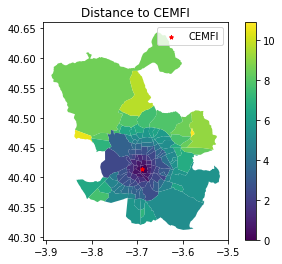

In [37]:
ax = polys.assign(
    dist=d2cemfi/1000
).plot("dist", legend=True)

cemfi.to_crs(
    polys.crs
).plot(
    marker="*", 
    markersize=15, 
    color="r", 
    label="CEMFI", 
    ax=ax
)

ax.legend()
ax.set_title(
    "Distance to CEMFI"
);

## 🐾 Next steps

If you are interested in following up on some of the topics explored in this block, the following pointers might be useful:

- Although we have seen here `geopandas` only, all non-geographic operations on geo-tables are really thanks to `pandas`, the workhorse for tabular data in Python. Their [official documentation](https://pandas.pydata.org/docs/) is an excellent first stop. If you prefer a book, McKinney (2012) {cite}`mckinney2012python` is a great one.
- For more detail on geographic operations on geo-tables, the [Geopandas official documentation](https://geopandas.org/) is a great place to continue the journey.
- Surfaces, as covered here, are really an example of multi-dimensional labelled arrays. The library we use, `xarray` represents the cutting edge for working with these data structures in Python, and [their documentation](https://xarray.pydata.org/) is a great place to wrap your head around how data of this type can be manipulated. For geographic extensions (CRS handling, reprojections, etc.), we have used `rioxarray` under the hood, and [its documentation](https://corteva.github.io/rioxarray/) is also well worth checking.